# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
from unityagents import UnityEnvironment

#from dqn_agent_ans import Agent
from dqn_agent_unity_PReplay_Tree import Agent
#from dqn_agent_unity_PReplay import Agent
#from dqn_agent_unity_prioritized_updateTD_weight import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/ubuntu/projects/rl/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]

BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)

state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


In [5]:
print(state.shape)

(37,)


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
"""
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
"""

'\nenv_info = env.reset(train_mode=False)[brain_name] # reset the environment\nstate = env_info.vector_observations[0]            # get the current state\nscore = 0                                          # initialize the score\nwhile True:\n    action = np.random.randint(action_size)        # select an action\n    env_info = env.step(action)[brain_name]        # send the action to the environment\n    next_state = env_info.vector_observations[0]   # get the next state\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\n    \nprint("Score: {}".format(score))\n'

When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
agent_unity = Agent(state_size=state_size, action_size=action_size, seed=0)

current device: cuda:0
use duel network (a and v): False
use double network: False
use reward scaling: False
use error clipping: False
buffer size: 100000
batch size: 64
initial learning rate: 0.0001
learing rate decay: True
min replay size: 100000
target network update: 16
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0001
    lr: 0.0001
    weight_decay: 0
)


In [9]:
def saveTrainedModel(agent, path):
    state_dicts = {'model': agent.qnetwork_local.state_dict(), 'optimizer': agent.optimizer.state_dict()}
    torch.save(state_dicts, path)

In [10]:
model_dir = 'saved_models/'
model_name = 'unity_linear_navigation.pt'

In [11]:
#state_dicts = torch.load(model_dir+model_name)
#print(state_dicts['model'].keys())

#agent_unity.qnetwork_local.load_state_dict(state_dicts['model'])
#agent_unity.optimizer.load_state_dict(state_dicts['optimizer'])

In [12]:
model_dir = 'saved_models/'
model_name = 'unity_linear_navigation.pt'
# after training, save your model parameters in the dir 'saved_models'
state_dicts = {'model': agent_unity.qnetwork_local.state_dict(), 
               'optimizer': agent_unity.optimizer.state_dict()}


def dqn_unity(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.1):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    eps_decay=0.997                    # make sure decay come to min 
    
    i_episode = 1
    
    while i_episode < n_episodes + 1:
        
        env_info = env.reset(train_mode=True)[brain_name]    #env reset and get initial state
        state = env_info.vector_observations[0] 

        score = 0
        for t in range(max_t):
            action = agent_unity.act(state, eps)              # agent get action from state
            
            env_info = env.step(action)[brain_name]           # send the action to the environment
            next_state = env_info.vector_observations[0]      # get the next state
            reward = env_info.rewards[0]                      # get the reward
            done = env_info.local_done[0]                     # get done status

            agent_unity.step(state , action, reward, next_state, done, (i_episode,n_episodes))
            
            state = next_state
            score += reward
            
            if done:
                break 
        
        if agent_unity.isTraining == True:     #learning starts   
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decay epsilon
            print('\rEpisode: {}\tAvg Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                
                latest_lr = agent_unity.optimizer.state_dict()['param_groups'][0]['lr']
                td_s = agent_unity.memory.tree.total_td_score

                #print('\rrEpisode: {}\tAvg Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
                print(('\rEpisode: {}\tAvg Score: {:.2f}\tsteps: {}  eps: {:.2f}  lr: {:1.2e}'
                       '\tp:{:.1f}   b:{:.2f}   td:{:.2f}').format(i_episode, np.mean(scores_window),
                                                                     agent_unity.t_step, eps, latest_lr, 
                                                                     agent_unity.p_replay_alpha, 
                                                                     agent_unity.p_replay_beta,
                                                                     td_s, end=""))
                
                torch.save(state_dicts, model_dir+model_name)

            if np.mean(scores_window)>=13.0:
                print('\rProblem solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100,
                                                                                        np.mean(scores_window)))

                torch.save(state_dicts, model_dir+model_name)
                break

            i_episode += 1
        else:
            print('\rTraining to be started... Steps: {} '.format(agent_unity.t_step), end="")

    return scores

scores = dqn_unity(2000)

Training to be started... Steps: 99900 current device: cuda:0
use duel network (a and v): False
use double network: False
use reward scaling: False
use error clipping: False
buffer size: 100000
batch size: 64
initial learning rate: 0.0001
learing rate decay: True
min replay size: 100000
target network update: 16
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0001
    lr: 0.0001
    weight_decay: 0
)
Prefetch completed. Training starts!                         
Episode: 100	Avg Score: 0.35	steps: 129900  eps: 0.74  lr: 1.00e-04	p:0.6   b:1.00   td:7028.48
Episode: 200	Avg Score: 1.07	steps: 159900  eps: 0.55  lr: 1.00e-04	p:0.6   b:1.00   td:6956.81
Episode: 300	Avg Score: 2.13	steps: 189900  eps: 0.41  lr: 1.00e-04	p:0.6   b:1.00   td:8186.42
Episode: 400	Avg Score: 3.78	steps: 219900  eps: 0.30  lr: 1.00e-04	p:0.6   b:1.00   td:9811.08
Episode: 500	Avg Score: 6.03	steps: 249900  eps: 0.22  lr: 1.00e-04	p:0.6   b:1.00   t

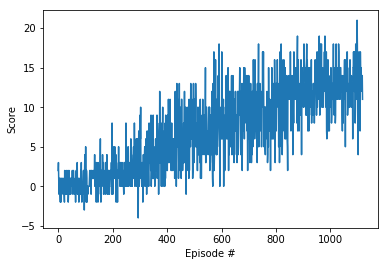

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#env.close()

In [14]:
torch.save(state_dicts, model_dir+model_name)

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent_unity.act(state, 0.0)           # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))